In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
cancer = pd.read_csv('breast-cancer.csv')
cancer.head(10)

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
5,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
6,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
7,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
8,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
9,no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no


In [3]:
features = cancer[['30-39', 'premeno', '30-34', '3', 'left', 'left_low', 'no.1']]

In [4]:
target = cancer[['no-recurrence-events']]

In [6]:
features.isna().sum()

30-39       0
premeno     0
30-34       0
3           0
left        0
left_low    0
no.1        0
dtype: int64

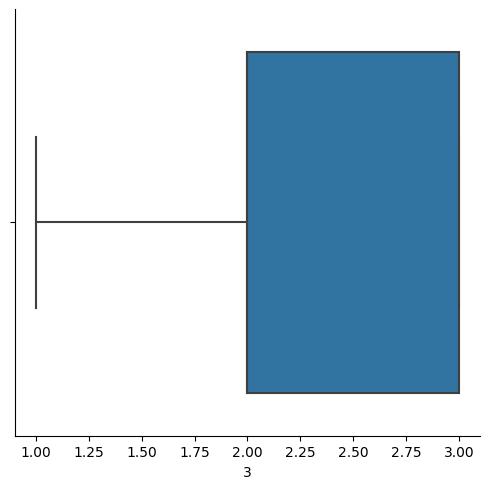

In [7]:
sns.catplot(features, x = '3', kind='box')

In [9]:
features.head(10)

,30-39,premeno,30-34,3,left,left_low,no.1
0,40-49,premeno,20-24,2,right,right_up,no
1,40-49,premeno,20-24,2,left,left_low,no
2,60-69,ge40,15-19,2,right,left_up,no
3,40-49,premeno,0-4,2,right,right_low,no
4,60-69,ge40,15-19,2,left,left_low,no
5,50-59,premeno,25-29,2,left,left_low,no
6,60-69,ge40,20-24,1,left,left_low,no
7,40-49,premeno,50-54,2,left,left_low,no
8,40-49,premeno,20-24,2,right,left_up,no
9,40-49,premeno,0-4,3,left,central,no


In [10]:
dummied_features = pd.get_dummies(features, columns=['30-39', 'premeno',
                                            '30-34', 'left',
                                            'left_low', 'no.1'],
                          drop_first=True)
dummied_features.head()

,3,30-39_30-39,30-39_40-49,30-39_50-59,30-39_60-69,30-39_70-79,premeno_lt40,premeno_premeno,30-34_10-14,30-34_15-19,...,30-34_45-49,30-34_5-9,30-34_50-54,left_right,left_low_central,left_low_left_low,left_low_left_up,left_low_right_low,left_low_right_up,no.1_yes
0,2,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,2,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(dummied_features, target, test_size = 0.3,
                                                    random_state = 42)

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
pred_y = logmodel.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
accuracy

0.6627906976744186

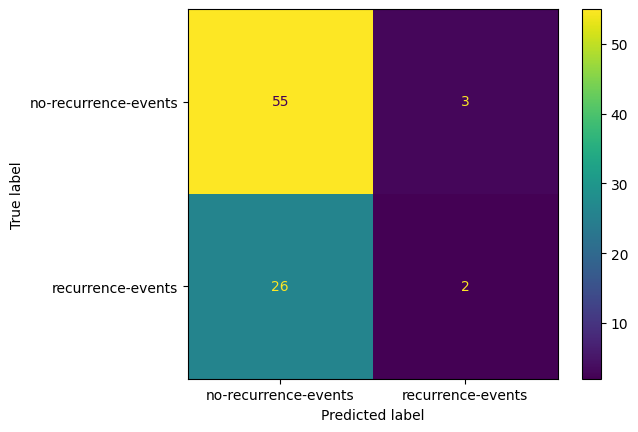

In [14]:
cm = confusion_matrix(y_test, pred_y, labels=logmodel.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=logmodel.classes_)
cmd.plot()
plt.show()

In [15]:
y_pred_prob = logmodel.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_prob)
print(f'Area under receiver operating characteristic curve (AUROC): {auroc}')

Area under receiver operating characteristic curve (AUROC): 0.5923645320197044


In [20]:
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [52]:
pred_y = KNN.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
accuracy

0.6976744186046512

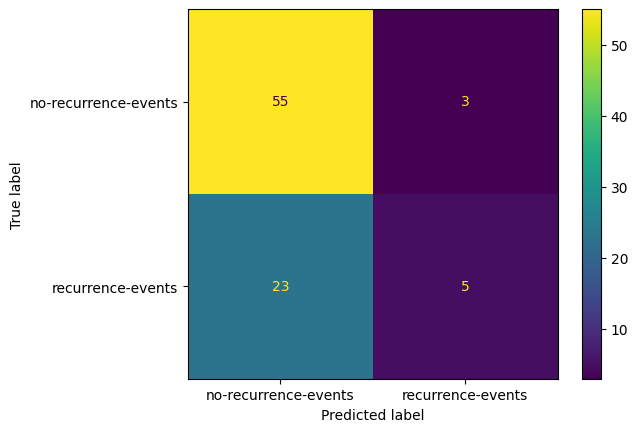

In [22]:
cm = confusion_matrix(y_test, pred_y, labels=KNN.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=KNN.classes_)
cmd.plot()
plt.show()

In [23]:
y_pred_prob2 = KNN.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_prob2)
print(f'Area under receiver operating characteristic curve (AUROC): {auroc}')

Area under receiver operating characteristic curve (AUROC): 0.5683497536945813


In [61]:
decis_tree = DecisionTreeClassifier()
decis_tree.fit(X_train, y_train)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

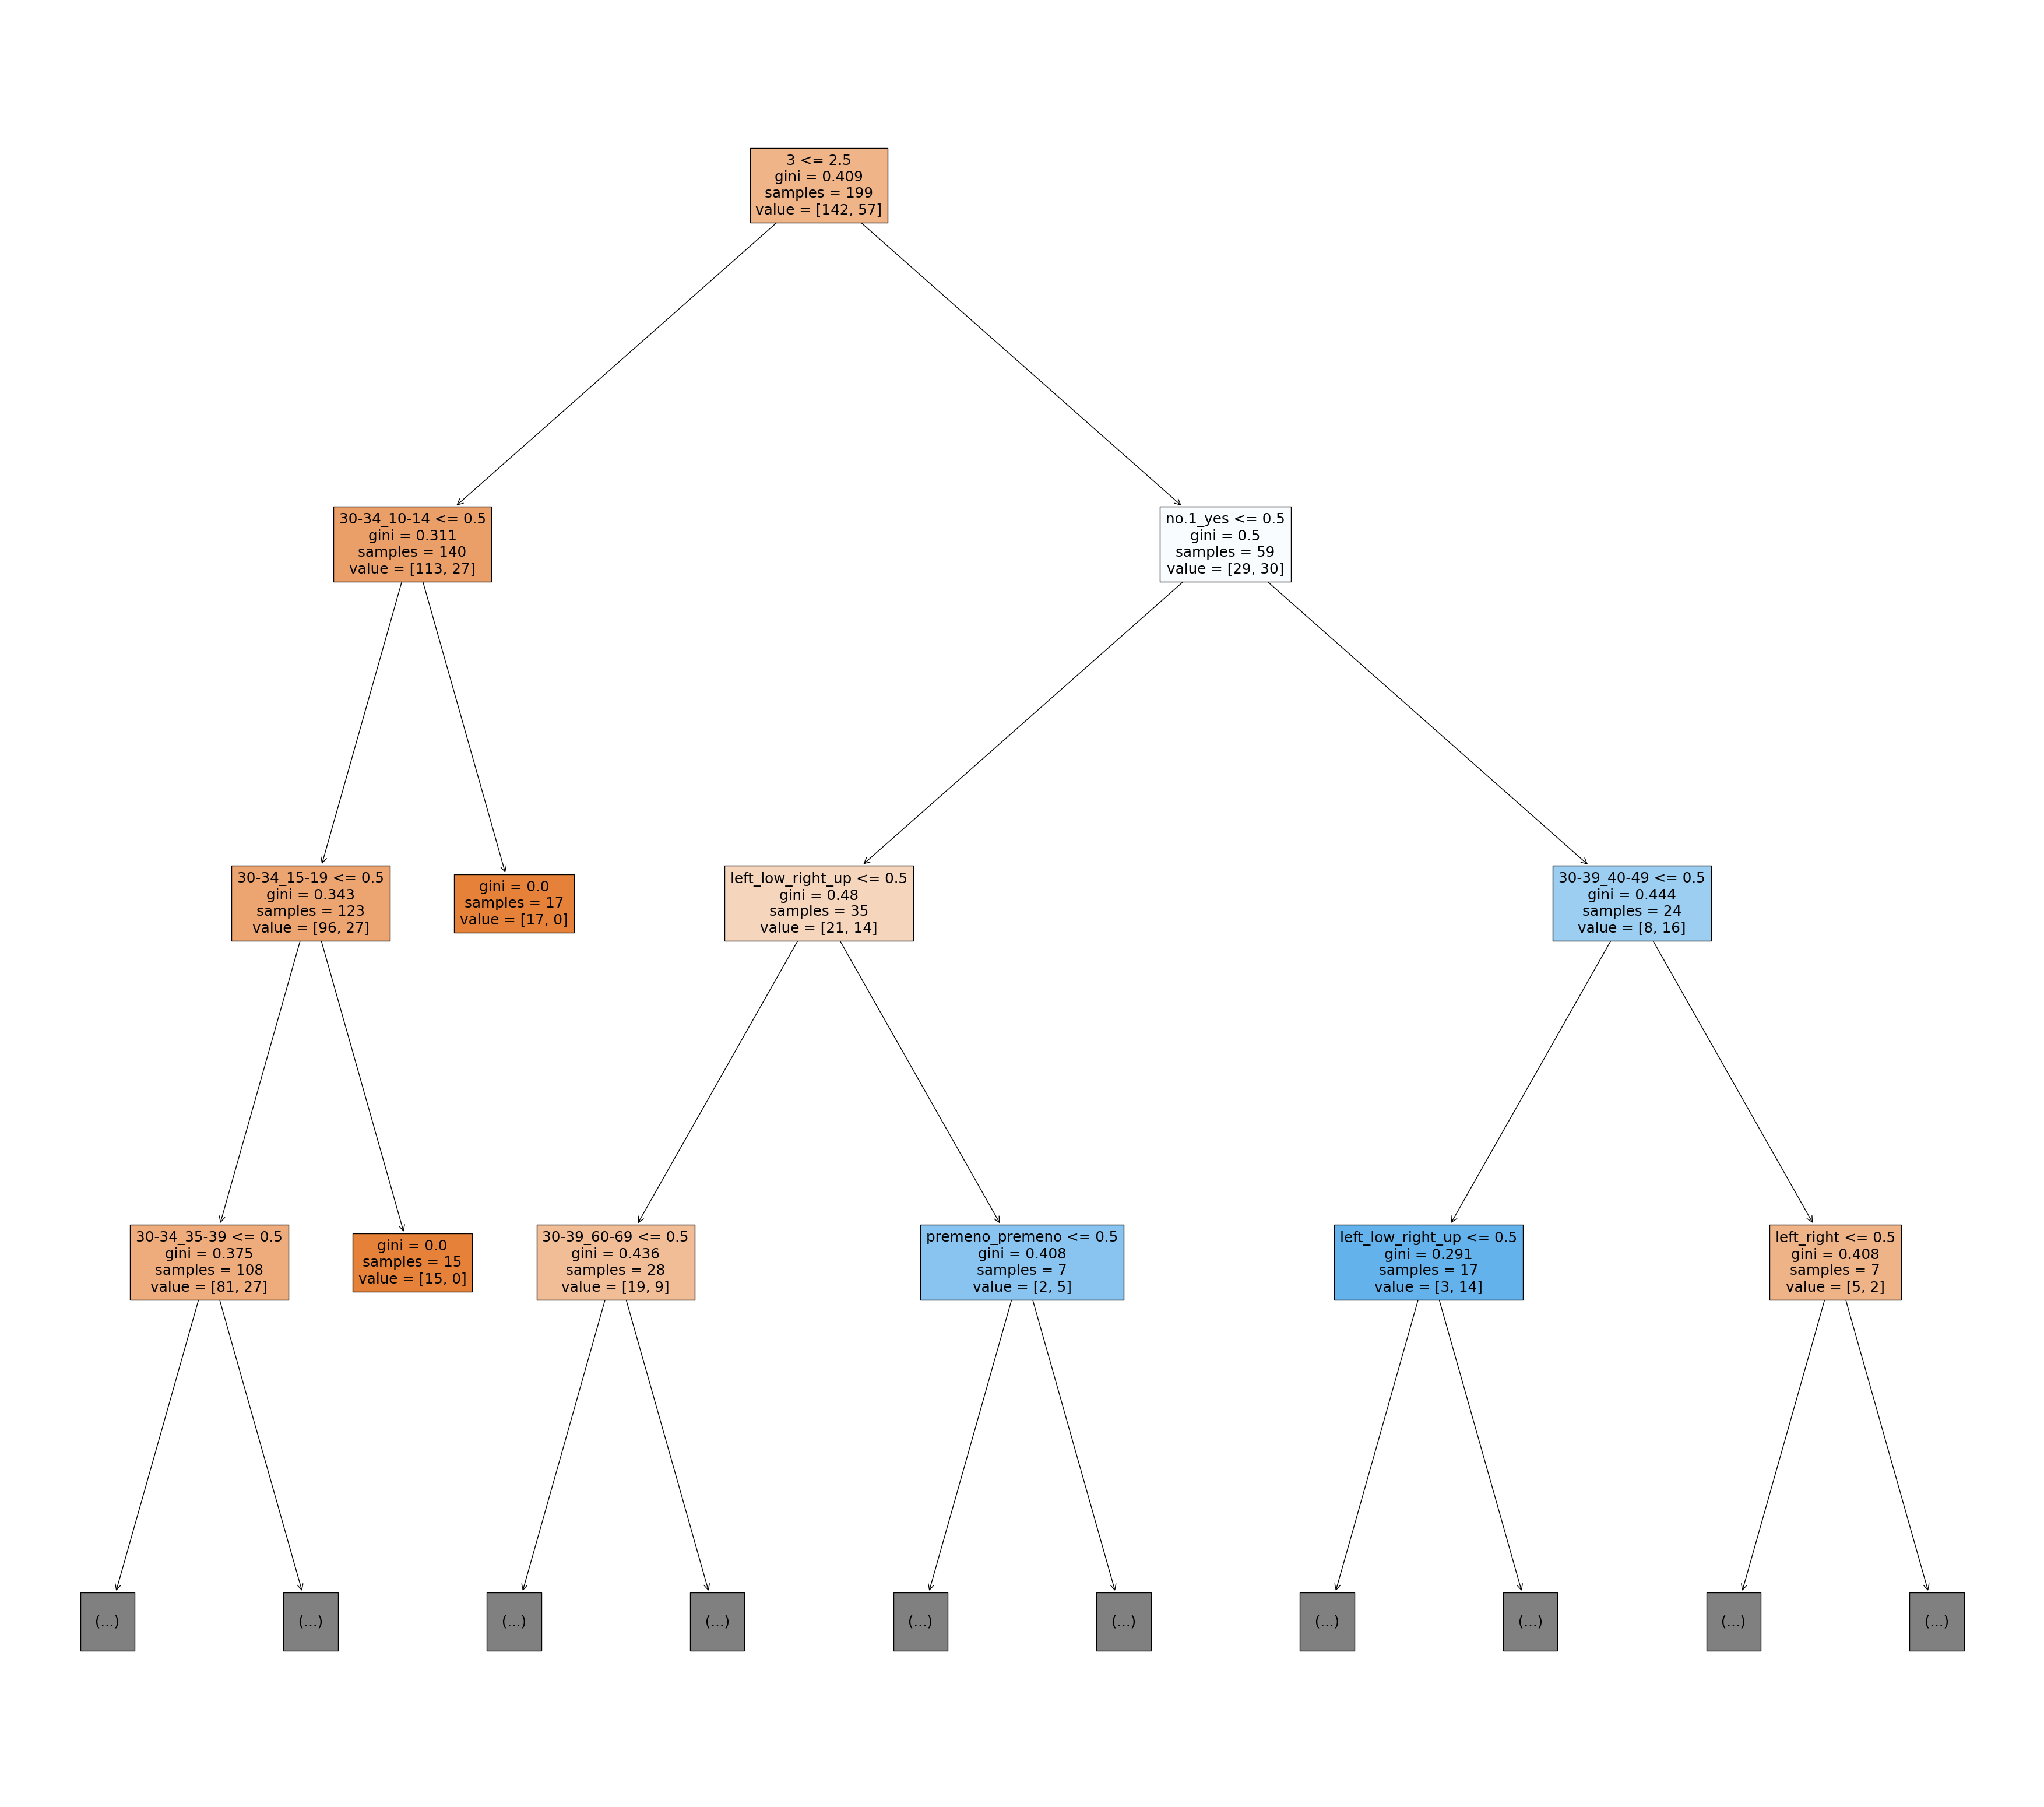

In [65]:
fig = plt.figure(figsize=(45,40))
tree.plot_tree(decis_tree, feature_names= list(X_train), filled=True, max_depth=3)
plt.show

In [53]:
pred_y = decis_tree.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
accuracy

0.6162790697674418

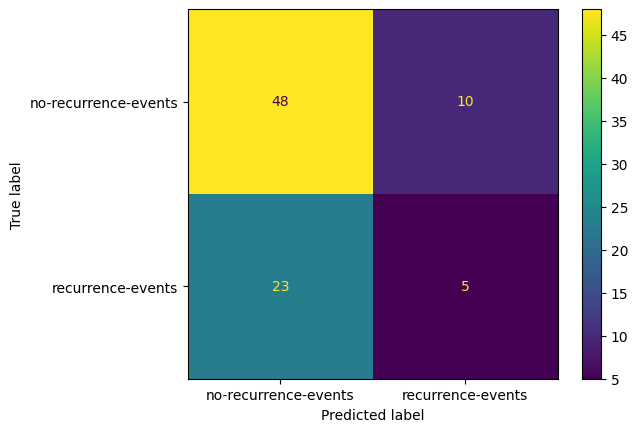

In [27]:
cm = confusion_matrix(y_test, pred_y, labels=decis_tree.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=decis_tree.classes_)
cmd.plot()
plt.show()

In [28]:
y_pred_prob3 = decis_tree.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_prob3)
print(f'Area under receiver operating characteristic curve (AUROC): {auroc}')

Area under receiver operating characteristic curve (AUROC): 0.5107758620689654


In [41]:
cancer_dummied = pd.get_dummies(cancer, columns=['30-39', 'premeno',
                                            '30-34', 'left',
                                            'left_low', 'no.1', 'no-recurrence-events'],
                          drop_first=True)
cancer_dummied.head()

,0-2,no,3,30-39_30-39,30-39_40-49,30-39_50-59,30-39_60-69,30-39_70-79,premeno_lt40,premeno_premeno,...,30-34_5-9,30-34_50-54,left_right,left_low_central,left_low_left_low,left_low_left_up,left_low_right_low,left_low_right_up,no.1_yes,no-recurrence-events_recurrence-events
0,0-2,no,2,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0-2,no,2,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0-2,no,2,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0-2,no,2,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0-2,no,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
correlation_matrix = cancer_dummied.corr()

<ipython-input-43-572193433948>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cancer_dummied.corr()


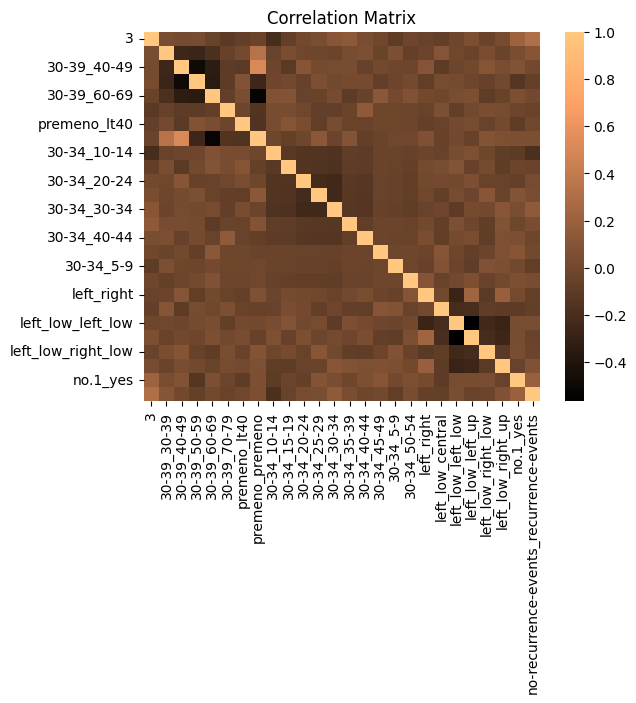

<Figure size 90000x90000 with 0 Axes>

In [67]:
sns.heatmap(correlation_matrix, annot=False, cmap='copper')
plt.title("Correlation Matrix")
plt.figure(figsize=(900, 900))
plt.show()

In [29]:
new_patient = [[2, 0, 0, 1, 0, 0, 0, 1, 0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1]]

In [30]:
prediction = logmodel.predict(new_patient)
print(prediction)

['no-recurrence-events']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
prediction = KNN.predict(new_patient)
print(prediction)

['no-recurrence-events']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
prediction = decis_tree.predict(new_patient)
print(prediction)

['no-recurrence-events']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
